In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, os

sns.set()

In [2]:
## Description
pd.read_csv(r'./data_description.csv')

,variabel,sample Data,Deskripsi
0,cash_in_echannel,7.924471e+09,Total Kas Masuk pada kas eChannel (ATM dan CRM)
1,cash_out_echannel,7.924471e+09,Total Kas keluar pada kas eChannel (ATM dan CRM)
2,cash_in_kantor,1.372300e+10,Total kas masuk pada kas kantor
3,cash_out_kantor,-2.767644e+10,Total kas keluar pada kas kantor
4,cr_ketetapan_total_bkn_sum,4.350000e+00,Maksimum cash ratio yang dii tetapkan kantor p...
5,giro,5.355247e+10,Total simpanan giro
6,deposito,1.344615e+10,Total simpanan deposito
7,kewajiban_lain,3.490872e+09,"Simpanan selain giro tabungan dan deposito ,sa..."
8,tabungan,1.659893e+11,Total simpanan tabungan
9,rata_dpk_mingguan,2.401906e+11,rata - rata saldo DPK mingguan


In [3]:
## Read dataset
dataset = pd.read_csv(r'./train.csv')
dataset.head()

,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
0,2019-07-31,7.303000e+08,-1.304400e+09,1.436722e+11,-1.106104e+11,3.0,9.867358e+11,8.048153e+11,1.419685e+10,7.072647e+11,3.135744e+11,1.928940e+09,2.939100e+09
1,2019-08-01,7.322000e+08,-8.321500e+08,3.144131e+11,-6.710987e+10,3.0,8.962459e+11,8.125611e+11,1.234062e+10,7.011995e+11,3.135744e+11,2.492322e+11,2.839150e+09
2,2019-08-02,1.169800e+09,-6.214000e+08,1.251294e+09,-1.142332e+09,3.0,9.059714e+11,8.127225e+11,1.182022e+10,6.922787e+11,3.135744e+11,2.493411e+11,3.387550e+09
3,2019-08-03,9.134500e+08,-4.240500e+08,0.000000e+00,0.000000e+00,3.0,9.057127e+11,8.127253e+11,1.199640e+10,6.867224e+11,3.135744e+11,2.493411e+11,3.876950e+09
4,2019-08-04,7.752500e+08,-7.779500e+08,9.883331e+10,-8.729274e+10,3.0,9.788347e+11,8.124711e+11,1.232962e+10,6.813438e+11,3.135744e+11,2.608817e+11,3.874250e+09


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
periode                       425 non-null object
cash_in_echannel              425 non-null float64
cash_out_echannel             425 non-null float64
cash_in_kantor                425 non-null float64
cash_out_kantor               425 non-null float64
cr_ketetapan_total_bkn_sum    425 non-null float64
giro                          425 non-null float64
deposito                      425 non-null float64
kewajiban_lain                425 non-null float64
tabungan                      425 non-null float64
rata_dpk_mingguan             425 non-null float64
kas_kantor                    425 non-null float64
kas_echannel                  425 non-null float64
dtypes: float64(12), object(1)
memory usage: 43.3+ KB


In [5]:
## Copy the dataset to manipulate the data
df = dataset.copy()

In [6]:
from datetime import datetime
## Changing the date format to float
df['periode'] = df['periode'].apply(lambda x: datetime.fromisoformat(x).timestamp())

In [7]:
print(df['periode'].dtype)
df.head()

float64


,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
0,1.564506e+09,7.303000e+08,-1.304400e+09,1.436722e+11,-1.106104e+11,3.0,9.867358e+11,8.048153e+11,1.419685e+10,7.072647e+11,3.135744e+11,1.928940e+09,2.939100e+09
1,1.564592e+09,7.322000e+08,-8.321500e+08,3.144131e+11,-6.710987e+10,3.0,8.962459e+11,8.125611e+11,1.234062e+10,7.011995e+11,3.135744e+11,2.492322e+11,2.839150e+09
2,1.564679e+09,1.169800e+09,-6.214000e+08,1.251294e+09,-1.142332e+09,3.0,9.059714e+11,8.127225e+11,1.182022e+10,6.922787e+11,3.135744e+11,2.493411e+11,3.387550e+09
3,1.564765e+09,9.134500e+08,-4.240500e+08,0.000000e+00,0.000000e+00,3.0,9.057127e+11,8.127253e+11,1.199640e+10,6.867224e+11,3.135744e+11,2.493411e+11,3.876950e+09
4,1.564852e+09,7.752500e+08,-7.779500e+08,9.883331e+10,-8.729274e+10,3.0,9.788347e+11,8.124711e+11,1.232962e+10,6.813438e+11,3.135744e+11,2.608817e+11,3.874250e+09


In [8]:
df.isna().sum()

periode                       0
cash_in_echannel              0
cash_out_echannel             0
cash_in_kantor                0
cash_out_kantor               0
cr_ketetapan_total_bkn_sum    0
giro                          0
deposito                      0
kewajiban_lain                0
tabungan                      0
rata_dpk_mingguan             0
kas_kantor                    0
kas_echannel                  0
dtype: int64

### Handling Missing Data 

In [9]:
dper = []
for i in range(1,df.shape[0]):
    dper.append(df['periode'][i]-df['periode'][i-1])
pd.Series(data=dper).value_counts()

86400.0     421
172800.0      3
dtype: int64

In [10]:
# Fill the missing value
m = df.shape[0]
mv = []
for i in range(1,df.shape[0]):
    tf, ti = df['periode'][i], df['periode'][i-1]
    dt = tf - ti
    if dt == 172800.0:
        mv.append(df.loc[[i-1,i],:].mean())
df = df.append(mv,ignore_index=True)
df = df.sort_values(by=['periode']).reset_index(drop=True)
display(df)

,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
0,1.564506e+09,7.303000e+08,-1.304400e+09,1.436722e+11,-1.106104e+11,3.0,9.867358e+11,8.048153e+11,1.419685e+10,7.072647e+11,3.135744e+11,1.928940e+09,2.939100e+09
1,1.564592e+09,7.322000e+08,-8.321500e+08,3.144131e+11,-6.710987e+10,3.0,8.962459e+11,8.125611e+11,1.234062e+10,7.011995e+11,3.135744e+11,2.492322e+11,2.839150e+09
2,1.564679e+09,1.169800e+09,-6.214000e+08,1.251294e+09,-1.142332e+09,3.0,9.059714e+11,8.127225e+11,1.182022e+10,6.922787e+11,3.135744e+11,2.493411e+11,3.387550e+09
3,1.564765e+09,9.134500e+08,-4.240500e+08,0.000000e+00,0.000000e+00,3.0,9.057127e+11,8.127253e+11,1.199640e+10,6.867224e+11,3.135744e+11,2.493411e+11,3.876950e+09
4,1.564852e+09,7.752500e+08,-7.779500e+08,9.883331e+10,-8.729274e+10,3.0,9.788347e+11,8.124711e+11,1.232962e+10,6.813438e+11,3.135744e+11,2.608817e+11,3.874250e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1.601053e+09,4.692000e+08,-2.264000e+08,0.000000e+00,0.000000e+00,3.0,6.770562e+11,7.984164e+11,1.234267e+10,7.260305e+11,2.978684e+11,1.123736e+13,5.085800e+09
424,1.601140e+09,5.272500e+08,-6.187500e+08,6.466720e+10,-7.829833e+10,3.0,8.005756e+11,7.979421e+11,1.226298e+10,7.243814e+11,2.978684e+11,1.122373e+13,4.994300e+09
425,1.601226e+09,7.438000e+08,-5.562000e+08,1.264345e+11,-8.203374e+10,3.0,1.531154e+12,7.961238e+11,1.521195e+10,7.234264e+11,2.978684e+11,1.126813e+13,5.181900e+09
426,1.601312e+09,1.009250e+09,-7.721000e+08,1.548627e+11,-7.443120e+10,3.0,8.638740e+11,7.731039e+11,1.320539e+10,7.201773e+11,2.978684e+11,1.134856e+13,5.419050e+09


### Visualization 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C1B4D7E08>,
      dtype=object)

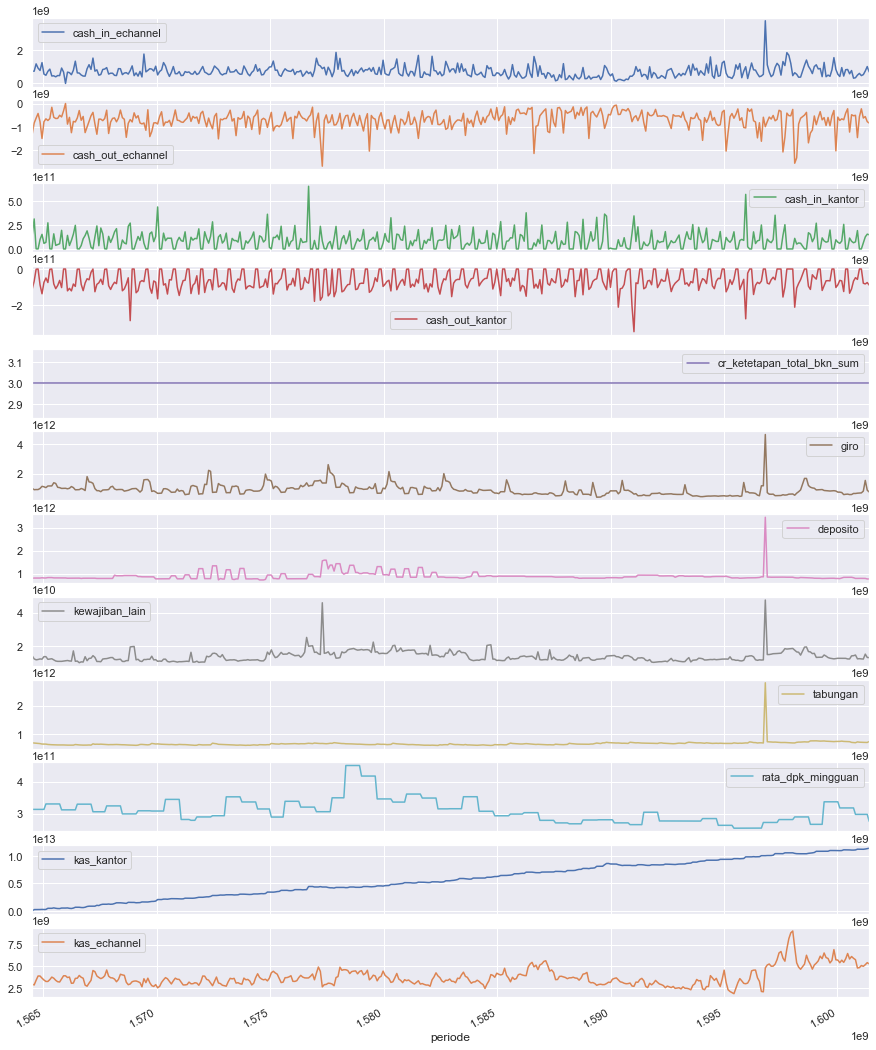

In [11]:
variable = 'periode'
features = [x for x in df.columns if x!= 'periode']
df.plot.line(variable, features,
            subplots = True, figsize=(15, 20))

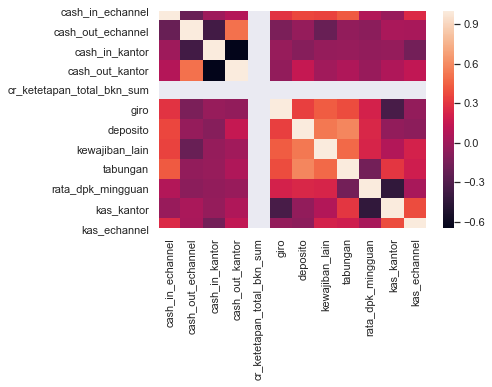

In [12]:
sns.heatmap(df.loc[:, features].corr())

In [13]:
df.loc[:,features].describe()

,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
count,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02,428.0,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02,4.280000e+02
mean,7.031335e+08,-6.987765e+08,8.957578e+10,-6.279401e+10,3.0,8.808492e+11,9.004378e+11,1.376173e+10,6.783749e+11,3.090219e+11,5.772953e+12,3.752884e+09
std,3.412510e+08,3.723917e+08,9.235494e+10,5.208940e+10,0.0,3.862306e+11,1.909518e+11,3.397314e+09,1.090189e+11,3.755760e+10,3.254040e+12,1.025612e+09
min,0.000000e+00,-2.670100e+09,0.000000e+00,-3.447494e+11,3.0,3.820936e+11,7.293214e+11,1.008030e+10,6.170567e+11,2.544115e+11,1.928940e+09,1.834650e+09
25%,4.729375e+08,-8.318875e+08,0.000000e+00,-9.581020e+10,3.0,6.124289e+11,8.079506e+11,1.170123e+10,6.435357e+11,2.801590e+11,2.993679e+12,3.090275e+09
50%,6.364500e+08,-6.349750e+08,7.910101e+10,-6.711632e+10,3.0,8.189379e+11,8.560448e+11,1.280006e+10,6.674770e+11,3.053965e+11,5.514835e+12,3.532900e+09
75%,8.526500e+08,-4.794375e+08,1.254789e+11,0.000000e+00,3.0,1.028097e+12,9.081542e+11,1.524670e+10,6.963100e+11,3.306770e+11,8.493601e+12,4.088550e+09
max,3.744400e+09,0.000000e+00,6.569255e+11,0.000000e+00,3.0,4.678342e+12,3.464395e+12,4.759059e+10,2.794601e+12,4.516209e+11,1.140874e+13,9.070650e+09


## Modeling
### Leading Indicator

In [22]:
from scipy.stats import pearsonr

In [16]:
features = [f for f in df.columns[:-1] if f not in ['periode',
                                                    'cr_ketetapan_total_bkn_sum']]

['cash_in_echannel',
 'cash_out_echannel',
 'cash_in_kantor',
 'cash_out_kantor',
 'giro',
 'deposito',
 'kewajiban_lain',
 'tabungan',
 'rata_dpk_mingguan',
 'kas_kantor']

In [ ]:
def cal_rho(c,lags):
    rhoc = []
    for item in c:
        yi = df.loc[:,item].to_numpy() # item series
        ye = df.loc[:,list(c.difference([item]))].sum(axis=1).to_numpy() 
        # sum of the series excluding the item
        rhok, kk = 0, 0
        for k in lags:
            if k<0:
                r = pearsonr(yi[-k:],ye[:k])[0]
            elif k==0:
                r = pearsonr(yi,ye)[0]
            else:
                r = pearsonr(yi[:-k],ye[k:])[0]
            if np.abs(r)>np.abs(rhok):
                rhok = r
                kk = k
        rhoc.append((item,rhok,kk))
    return rhoc

def makerandomsubset(rhoc, size, features):
    col = []
    
    return col

In [32]:
kmin, kmax, rhomin = -75, 75, 0.7
lags = np.arange(kmin,kmax+1,1)
Col = [set(features)]
rhoCol = [0]
lead = dict()
cond = True
while cond:
    tempCol, temprc = [], []
    rm = 0
    for c, rc in zip(Col,rhoCol):
        if rc>rhomin:
            tempCol.append(c)
            temprc.append(rho)
            continue
        rhoc = cal_rho(c,lags)
        rm += np.mean([x[1] for x in rhoc])
        item, rho, lag = max(rhoc, key=lambda x: x[1])
        if rho>rhomin:
            lead.append({'indicator': item, 
                         'group': c.difference([item]),
                         'rho': rho, 'lag': lag})
            
        cc = makerandomsubset(rhoc, size, features)
        tempCol.extend(cc)
        temprc.extend([0]*len(cc))
    Col, rhoCol = tempCol, temprc
    if step>5:
        cond = False
lead

[('cash_out_kantor', 0.08262075043276752, -37),
 ('cash_in_echannel', -0.20377664508018192, 72),
 ('tabungan', 0.5765133520428569, 58),
 ('kewajiban_lain', 0.18223882772644404, 0),
 ('rata_dpk_mingguan', -0.4831962521758437, 24),
 ('cash_in_kantor', -0.060470168914145264, 74),
 ('deposito', -0.2106426190816195, -75),
 ('giro', -0.48954861939788546, 56),
 ('kas_kantor', -0.43028658771150186, -56),
 ('cash_out_echannel', 0.1893455004531238, 75)]

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [36]:
max([('z',0),('a',1)], key= lambda x: x[0])

('z', 0)